<a href="https://colab.research.google.com/github/wendirad/weekFour/blob/task-1/notebooks/task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/content/store.csv')
test = pd.read_csv('/content/test.csv')
train = pd.read_csv('/content/train.csv')
clean_data = pd.read_csv('/content/clean_data.csv')

In [4]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10950 entries, 0 to 10949
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            10950 non-null  object
 1   Store           10950 non-null  int64 
 2   Store_Type      10950 non-null  object
 3   Store_Status    10950 non-null  int64 
 4   Promo           10950 non-null  int64 
 5   Promo2          10950 non-null  int64 
 6   School_Holiday  10950 non-null  int64 
 7   Customers       10950 non-null  int64 
 8   Sales           10950 non-null  int64 
 9   DayOfWeek       10950 non-null  int64 
 10  is_holiday      10950 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 941.1+ KB


In [5]:
clean_data.describe()

,Store,Store_Status,Promo,Promo2,School_Holiday,Customers,Sales,DayOfWeek,is_holiday
count,10950.000000,10950.000000,10950.000000,10950.000000,10950.000000,10950.000000,10950.000000,10950.000000,10950.000000
mean,5.500000,0.899087,0.300457,0.149315,0.252055,87.575708,304.372511,3.005479,0.037443
std,2.872412,0.301228,0.458478,0.356415,0.434212,31.567305,461.786570,2.000540,0.189853
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,0.000000,0.000000,0.000000,86.000000,0.000000,1.000000,0.000000
50%,5.500000,1.000000,0.000000,0.000000,0.000000,96.000000,33.000000,3.000000,0.000000
75%,8.000000,1.000000,1.000000,0.000000,1.000000,105.000000,714.000000,5.000000,0.000000
max,10.000000,1.000000,1.000000,1.000000,1.000000,148.000000,1793.000000,6.000000,1.000000


## Distribution of Competition Distance

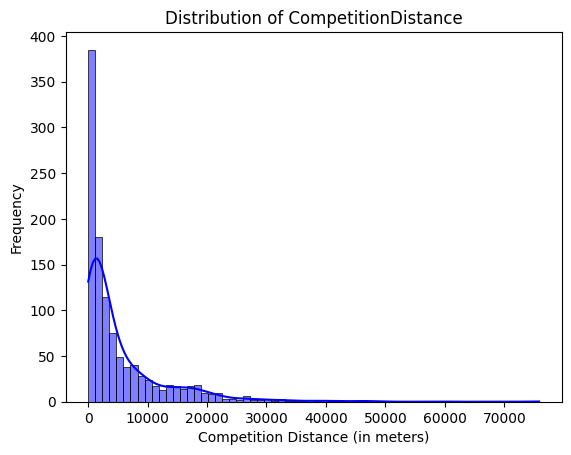

In [6]:
sns.histplot(data["CompetitionDistance"], kde=True, color='blue')
plt.title("Distribution of Competition Distance")
plt.xlabel("Competition Distance (in meters)")
plt.ylabel("Frequency")
plt.show()

## Distribution of Promo in Both Training and Testing Datasets

<ipython-input-8-555224272d44>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Promo', data=train, palette='Blues', alpha=0.7)


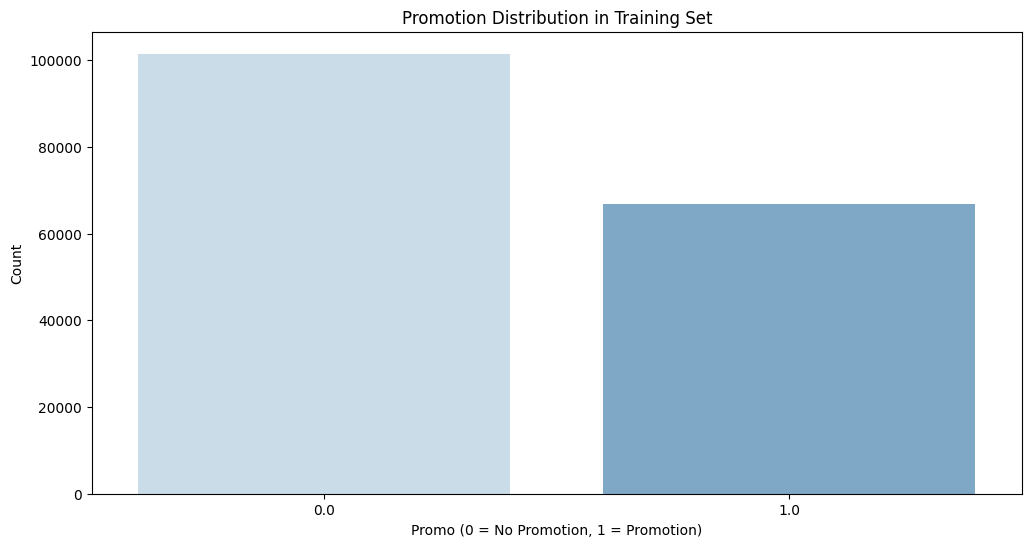

<ipython-input-8-555224272d44>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Promo', data=test, palette='Blues', alpha=0.7)


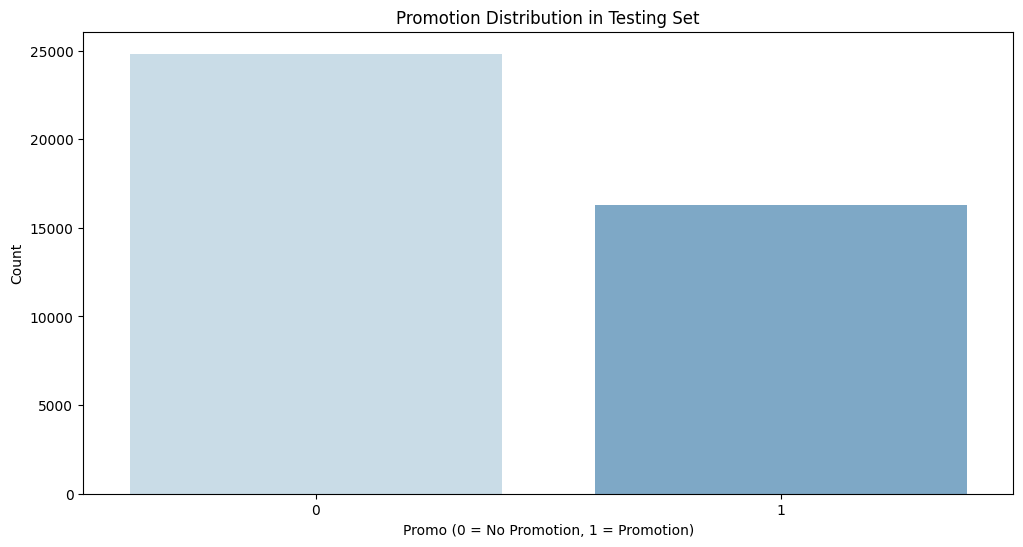

In [8]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Promo', data=train, palette='Blues', alpha=0.7)
plt.title('Promotion Distribution in Training Set')
plt.xlabel('Promo (0 = No Promotion, 1 = Promotion)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='Promo', data=test, palette='Blues', alpha=0.7)
plt.title('Promotion Distribution in Testing Set')
plt.xlabel('Promo (0 = No Promotion, 1 = Promotion)')
plt.ylabel('Count')
plt.show()

The proportion of stores with promotions in both sets is **fairly consistent**, which helps ensure that your model will be exposed to similar conditions during both training and testing. However, different data sizes can still influence model performance due to the amount of data available for training versus testing.  **Larger training** set generally helps the model learn more patterns, leading to better generalization

In [9]:
promo_analysis = clean_data.groupby('Promo').agg(
    avg_sales=('Sales', 'mean'),
    total_sales=('Sales', 'sum'),
    avg_customers=('Customers', 'mean'),
    total_customers=('Customers', 'sum')
).reset_index()

In [10]:
# Calculate average sales per customer
promo_analysis['sales_per_customer'] = promo_analysis['avg_sales'] / promo_analysis['avg_customers']
promo_analysis

,Promo,avg_sales,total_sales,avg_customers,total_customers,sales_per_customer
0,0,35.395692,271131,87.656789,671451,0.403799
1,1,930.622492,3061748,87.386930,287503,10.649447


<ipython-input-13-008a699fecbe>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=promo_analysis, x='Promo', y='avg_sales', palette='viridis')


Text(0, 0.5, 'Average Sales')

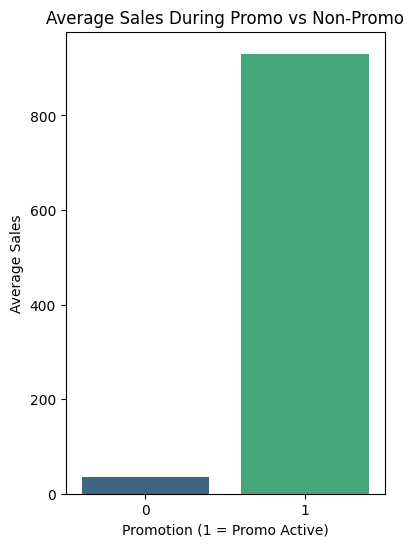

In [13]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
sns.barplot(data=promo_analysis, x='Promo', y='avg_sales', palette='viridis')
plt.title('Average Sales During Promo vs Non-Promo')
plt.xlabel('Promotion (1 = Promo Active)')
plt.ylabel('Average Sales')


<ipython-input-14-331a0afe6282>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=promo_analysis, x='Promo', y='avg_customers', palette='coolwarm')


Text(0, 0.5, 'Average Customers')

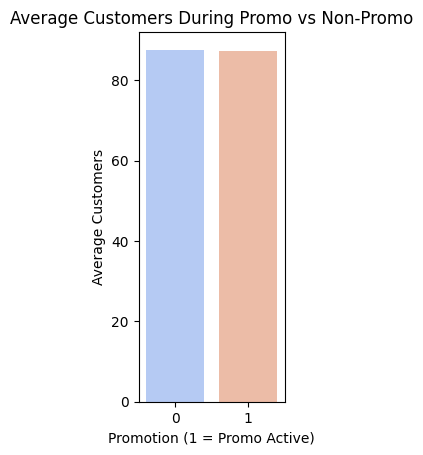

In [14]:
  plt.subplot(1, 3, 2)
  sns.barplot(data=promo_analysis, x='Promo', y='avg_customers', palette='coolwarm')
  plt.title('Average Customers During Promo vs Non-Promo')
  plt.xlabel('Promotion (1 = Promo Active)')
  plt.ylabel('Average Customers')

<ipython-input-15-0be28fb6c45d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=promo_analysis, x='Promo', y='sales_per_customer', palette='plasma')


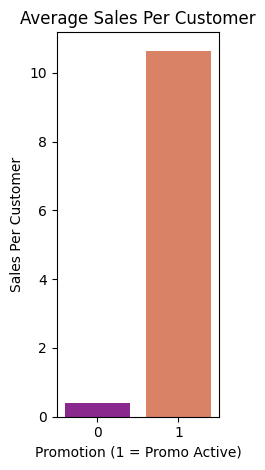

In [15]:
plt.subplot(1, 3, 3)
sns.barplot(data=promo_analysis, x='Promo', y='sales_per_customer', palette='plasma')
plt.title('Average Sales Per Customer')
plt.xlabel('Promotion (1 = Promo Active)')
plt.ylabel('Sales Per Customer')

plt.tight_layout()
plt.show()

### **Key Insights on Promo Impact**:

1. **Promotions Boost Spending**:
   - Sales per customer during promotions (`10.65`) are much higher than during non-promo periods (`0.40`).

2. **No Increase in Customer Footfall**:
   - The average number of customers remains nearly the same (`~87`) for both promo and no-promo periods.

3. **Sales Growth Driven by Existing Customers**:
   - Promotions lead to a substantial increase in total sales, primarily due to higher spending by the same customer base.

In [16]:
store_promo_analysis = clean_data.groupby(["Store", "Promo"]).agg(
    avg_sales=("Sales", "mean"),
    total_sales=("Sales", "sum"),
    avg_customers=("Customers", "mean"),
    sales_per_customer=("Sales", lambda x: x.sum() / clean_data.loc[x.index, "Customers"].sum())
).reset_index()

In [17]:
store_promo_analysis

,Store,Promo,avg_sales,total_sales,avg_customers,sales_per_customer
0,1,0,36.705007,27125,86.751015,0.423108
1,1,1,916.056180,326116,86.699438,10.565884
2,2,0,36.001311,27469,88.724771,0.405764
3,2,1,958.174699,318114,88.168675,10.867518
4,3,0,34.734478,26294,87.651255,0.396280
5,3,1,947.837278,320369,89.171598,10.629363
6,4,0,37.673077,27426,88.625000,0.425084
7,4,1,922.588556,338590,86.384196,10.680062
8,5,0,33.432756,25108,88.968043,0.375784
9,5,1,931.444767,320417,86.357558,10.785909


In [18]:
underperforming_stores = store_promo_analysis[
    (store_promo_analysis["Promo"] == 1) &
    (store_promo_analysis["sales_per_customer"] < 10.5)
]

In [19]:
underperforming_stores

,Store,Promo,avg_sales,total_sales,avg_customers,sales_per_customer
13,7,1,905.705128,282580,86.560897,10.463213


**Promotions Are Equally Effective:**

- Promotions yield similar sales per customer across most stores, indicating uniform promotional impact.

In [20]:
# Filter stores with 5 working days in the week
weekday_stores = clean_data[clean_data['DayOfWeek'] <= 5]
weekday_open_stores = weekday_stores.groupby('Store')['DayOfWeek'].count()
consistent_weekday_stores = weekday_open_stores[weekday_open_stores == 5].index

# Filter weekend data for these stores
weekend_data = clean_data[(clean_data['DayOfWeek'] > 5)]

In [32]:
weekday_stores = weekday_stores.groupby(['Store']).agg(
    avg_sales=('Sales', 'mean'),
    total_sales=('Sales', 'sum'),
    avg_customers=('Customers', 'mean'),
    total_customers=('Customers', 'sum'),
    dayOfweek = ('DayOfWeek', 'unique'),
    sales_per_customer=('Sales', lambda x: x.sum() / weekend_data['Customers'].sum())
).reset_index()

In [33]:
weekend_sales = weekend_data.groupby(['Store']).agg(
    avg_sales=('Sales', 'mean'),
    total_sales=('Sales', 'sum'),
    avg_customers=('Customers', 'mean'),
    total_customers=('Customers', 'sum'),
    dayOfweek = ('DayOfWeek', 'unique'),
    sales_per_customer=('Sales', lambda x: x.sum() / weekend_data['Customers'].sum())
).reset_index()

In [34]:
weekend_sales

,Store,avg_sales,total_sales,avg_customers,total_customers,dayOfweek,sales_per_customer
0,1,370.713376,58202,87.936306,13806,[6],0.421491
1,2,267.343949,41973,87.573248,13749,[6],0.303963
2,3,345.541401,54250,88.949045,13965,[6],0.392871
3,4,383.891720,60271,89.566879,14062,[6],0.436474
4,5,312.668790,49089,88.375796,13875,[6],0.355496
5,6,274.121019,43037,86.700637,13612,[6],0.311668
6,7,361.764331,56797,83.783439,13154,[6],0.411316
7,8,267.847134,42052,85.503185,13424,[6],0.304535
8,9,340.541401,53465,91.044586,14294,[6],0.387186
9,10,295.382166,46375,90.095541,14145,[6],0.335841


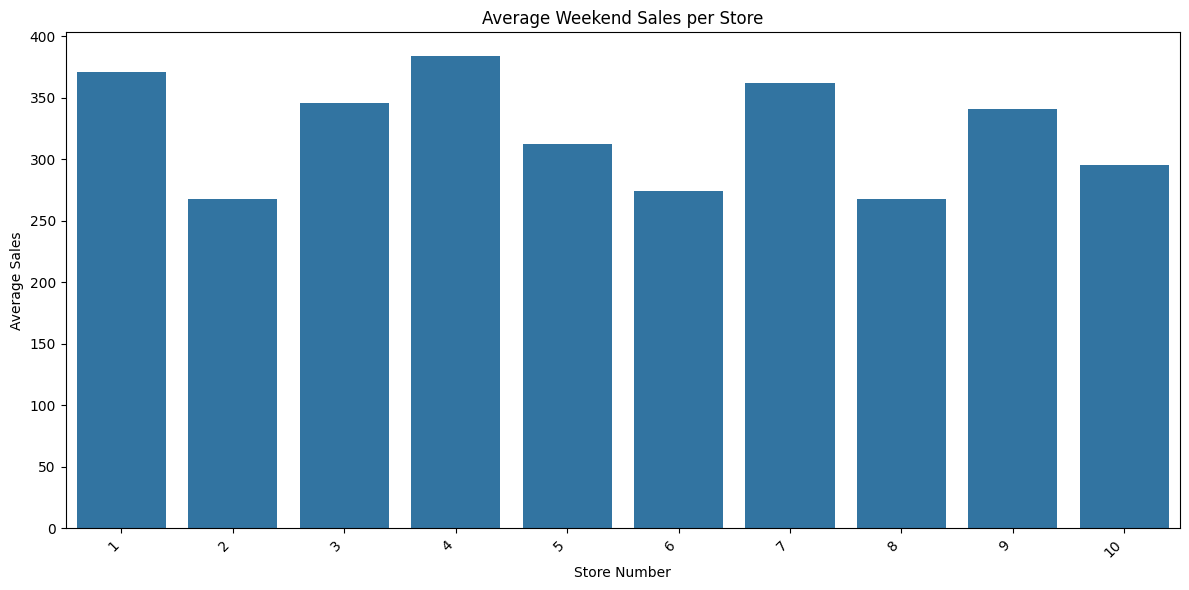

In [35]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Store', y='avg_sales', data=weekend_sales)
plt.title('Average Weekend Sales per Store')
plt.xlabel('Store Number')
plt.ylabel('Average Sales')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## Sales on normal weekday

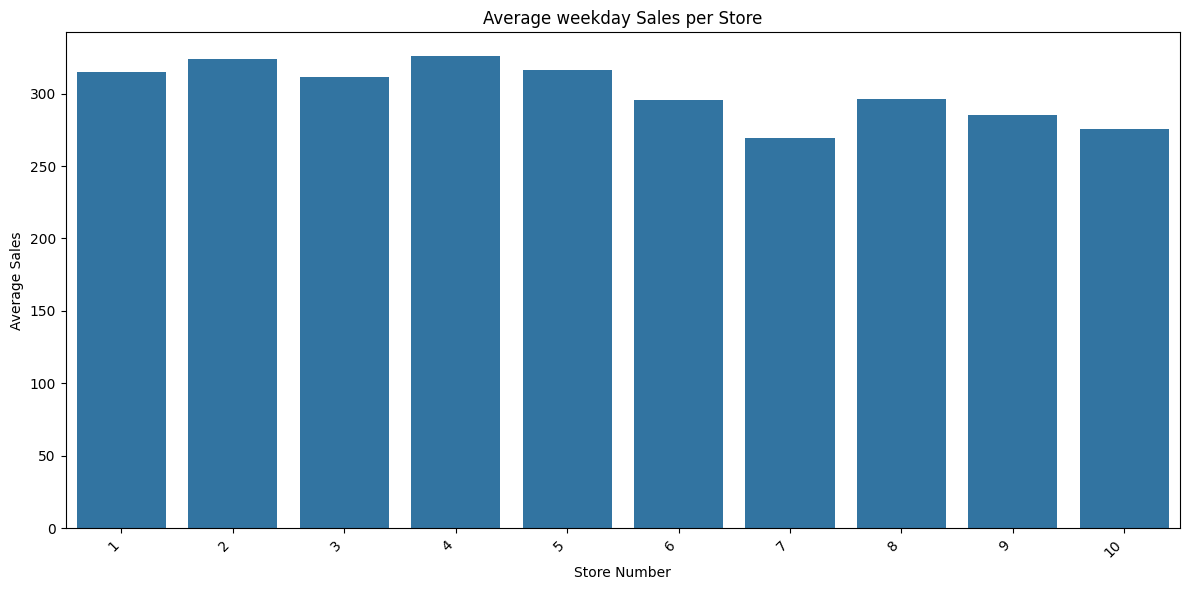

In [37]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Store', y='avg_sales', data=weekday_stores)
plt.title('Average weekday Sales per Store')
plt.xlabel('Store Number')
plt.ylabel('Average Sales')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

The data indicates that on **weekends** (specifically the 6th day of the week), sales and customer patterns vary slightly across stores. While the average number of customers remains relatively consistent across all stores , the average sales per store differ significantly.